In [ ]:
import pandas as pd #importando a lib

In [67]:
df = pd.read_csv('train.csv') #carregando o arquivo .csv
df.shape #verifica as dimensões do dataframe

(891, 12)

In [68]:
df.describe() # obtendo uma descrição detalhada do arquivo com suas linhas e colunas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df.columns #obtendo as colunas do arquivo para poder selecionar as features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
selected_features = df[['Age', 'Sex', 'Pclass', 'Fare', 'Survived']] #selecionando as features
selected_features.isnull().sum() #realiza a média

Age         177
Sex           0
Pclass        0
Fare          0
Survived      0
dtype: int64

In [71]:
selected_features.dropna(inplace = True) #removendo todos os valores ausentes
selected_features.isnull().sum()
selected_features.shape

<ipython-input-71-aba7ac33e4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.dropna(inplace = True) #removendo todos os valores ausentes


(714, 5)

In [72]:
from sklearn.preprocessing import LabelEncoder #converte as variaveis para um formato numerico
labelEncoder = LabelEncoder()
selected_features['Sex'] = labelEncoder.fit_transform(selected_features['Sex'])

<ipython-input-72-876fe347c0d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Sex'] = labelEncoder.fit_transform(selected_features['Sex'])


In [73]:
#separação do dataset em x e y, onde x são os atributos que serão usados como entradas para seus modelos, e y é a ariável alvo que será prevista
X = selected_features[['Age', 'Sex', 'Pclass', 'Fare']]
y = selected_features['Survived']
X.shape, y.shape

((714, 4), (714,))

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #divide os dados em treinamento e teste, on 20% dos dados serão reservados para teste

DECISION TREE

In [82]:
#DecisionTree, iniciando o treinamento

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #usando a lib accuracy_score para prever a acurácia da previsão do modelo

#treina o modelo com os dados de treinamento
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
#com o modelo treinado começa as previsões de quem sobreviveu ou não
predictions = Dt_clf.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [84]:
score = accuracy_score(y_test, predictions) #compara as predictions com os valores reais dos dados de teste e calcula a proporção de previsões corretas
score

0.7552447552447552

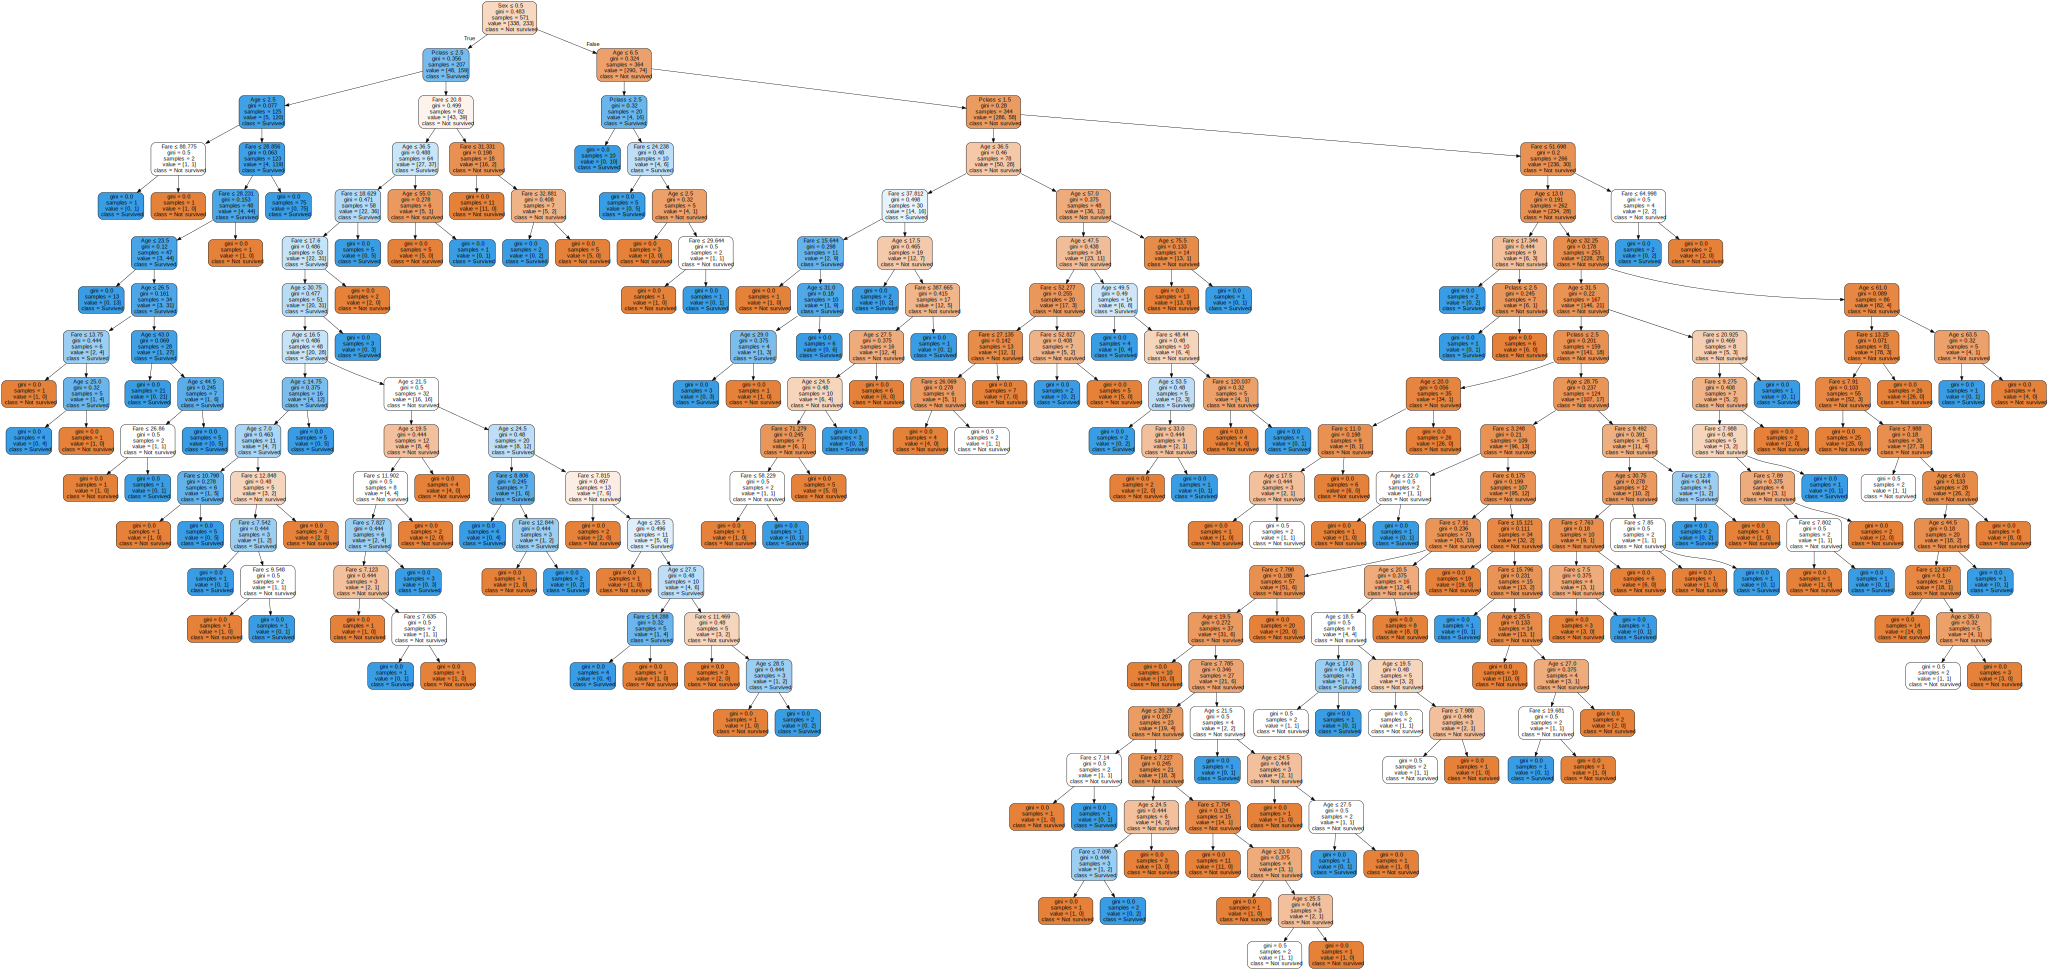

In [78]:
from sklearn import tree # visualizar a árvore de decisão treinada
from sklearn.tree import export_graphviz
import graphviz

dot_model = export_graphviz(
              Dt_clf, out_file = None, filled = True, rounded = True, class_names = ['Not survived', 'Survived'], special_characters = True, feature_names = X.columns, label = 'all'
            )

#
#Dt_clf: O modelo de Árvore de Decisão treinado.
#out_file=None: Não deseja salvar o arquivo em disco, então é definido como None.
#filled=True: Preenche os nós da árvore com cores.
#rounded=True: Torna os cantos dos nós arredondados.
#class_names=['Not survived', 'Survived']: Nomes das classes para as folhas da árvore.
#special_characters=True: Permite caracteres especiais na saída.
#feature_names=X_columns: Nomes das características (colunas) que você usou para treinar o modelo.
#label='all': Etiqueta para mostrar em cada nó da árvore.
#

graph = graphviz.Source(dot_model)
graph

In [86]:
# Avaliação do desempenho do modelo Decison Tree utilizando métricas apropriadas, como acurácia, precisão, recall, F1-score e matriz de confusão, com base nos resultados do conjuntode teste.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

# Exibir os resultados
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Matriz de Confusão:")
print(conf_matrix)

Acurácia: 0.7552447552447552
Precisão: 0.7037037037037037
Recall: 0.6666666666666666
F1-Score: 0.6846846846846847
Matriz de Confusão:
[[70 16]
 [19 38]]


RANDOM FOREST

In [92]:
#RandomForest, iniciando o treinamento

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de árvores
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
# Inicia as previsões utilizando o modelo treinado
rf_predictions = rf_clf.predict(X_test)

score = accuracy_score(y_test, rf_predictions) #compara as predictions com os valores reais dos dados de teste e calcula a proporção de previsões corretas
score

0.7692307692307693

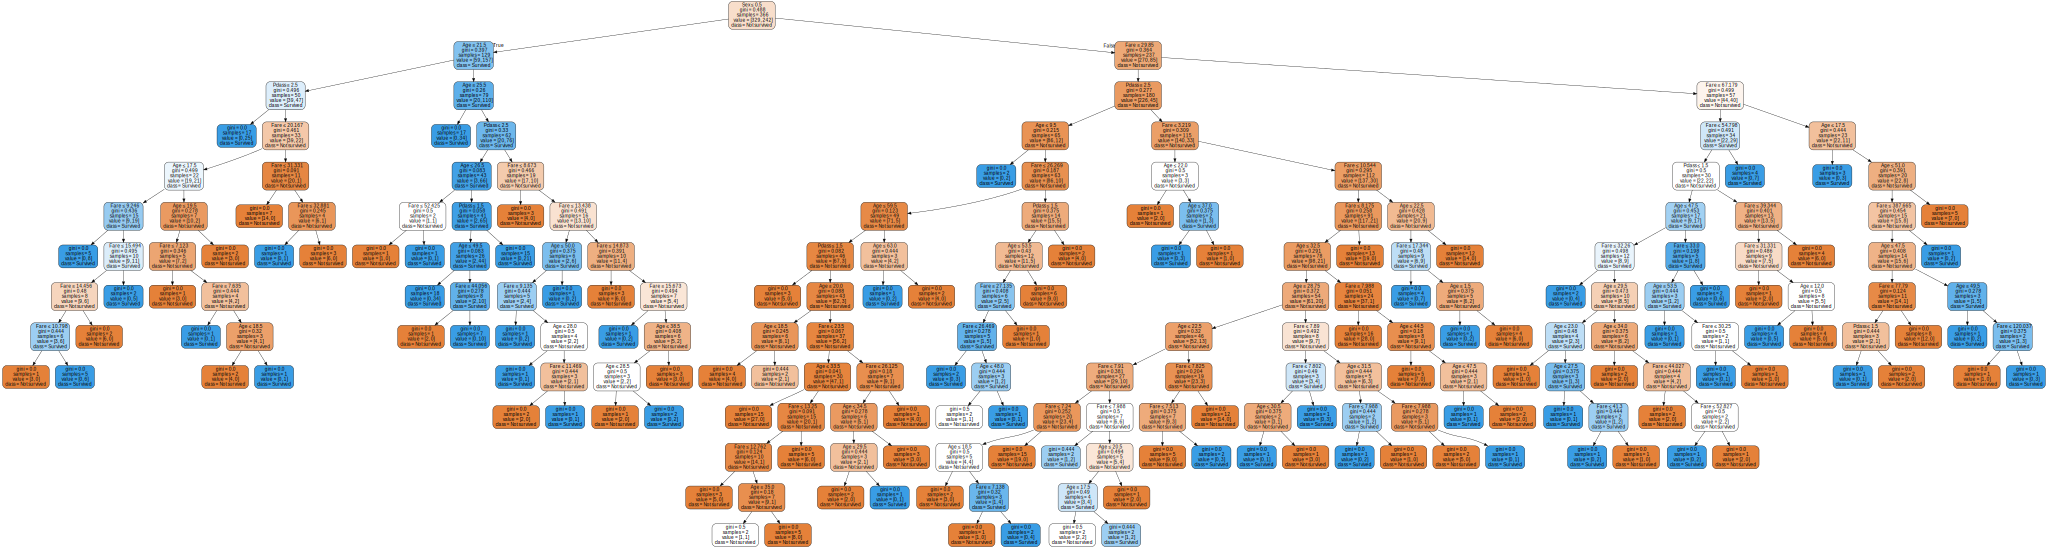

In [89]:
# Visualizar a árvore de decisão treinada (aqui, escolhemos a primeira árvore)
random_tree = rf_clf.estimators_[0]  # acessa a primeira árvore

dot_model = export_graphviz(
              random_tree, out_file=None, filled=True, rounded=True, class_names=['Not survived', 'Survived'], special_characters=True, feature_names=X.columns, label='all'
            )

#random_tree: É o objeto da árvore de decisão
#out_file=None: Especifica o nome do arquivo de saída onde o código DOT gerado será gravado.
#filled=True: preenche os nós da árvore com cores, onde a cor indica a classe de destino majoritária naquela parte da árvore.
#rounded=True: arredonda os cantos dos nós na representação gráfica.
#class_names=['Not survived', 'Survived']: Especifica os nomes das classes de destino.
#special_characters=True: Permite a inclusão de caracteres especiais na saída, se necessário.
#feature_names=X.columns: Define os nomes das colunas
#label='all': Define o rótulo que será exibido em cada nó da árvore.

graph= graphviz.Source(dot_model)
graph

In [93]:
# Avaliação do desempenho do modelo Random Forest utilizando métricas apropriadas, como acurácia, precisão, recall, F1-score e matriz de confusão, com base nos resultados do conjuntode teste.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

# Exibir os resultados
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Matriz de Confusão:")
print(conf_matrix)

Acurácia: 0.7692307692307693
Precisão: 0.7222222222222222
Recall: 0.6842105263157895
F1-Score: 0.7027027027027027
Matriz de Confusão:
[[71 15]
 [18 39]]


K-NN

In [98]:
#K-nn, iniciando o treinamento

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=19)  # Número de vizinhos considerados
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [99]:
# inicia as previsões usando o modelo treinado
knn_predictions = knn_clf.predict(X_test)

# Avaliação da precisão do modelo KNN
score = accuracy_score(y_test, knn_predictions) #compara as predictions com os valores reais dos dados de teste e calcula a proporção de previsões corretas
score

0.6643356643356644

In [100]:
# Avaliação do desempenho do modelo K-nn utilizando métricas apropriadas, como acurácia, precisão, recall, F1-score e matriz de confusão, com base nos resultados do conjuntode teste.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

# Exibir os resultados
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Matriz de Confusão:")
print(conf_matrix)

Acurácia: 0.6853146853146853
Precisão: 0.6153846153846154
Recall: 0.5614035087719298
F1-Score: 0.5871559633027522
Matriz de Confusão:
[[66 20]
 [25 32]]
